#### Import basic libraries

In [ ]:
 !pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [ ]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features.copy()
y = bank_marketing.data.targets.copy()

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
14796,31,technician,single,secondary,no,35,no,yes,cellular,16,jul,229,1,-1,0,NaN
21611,60,self-employed,married,tertiary,no,2149,no,no,cellular,19,aug,222,4,-1,0,NaN
250,49,admin.,married,secondary,no,428,yes,no,NaN,5,may,50,1,-1,0,NaN
10715,39,technician,married,secondary,no,94,no,no,NaN,16,jun,182,2,-1,0,NaN
18362,52,management,married,tertiary,no,4358,no,no,telephone,31,jul,30,7,-1,0,NaN


In [ ]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [ ]:
# Q1.1
df.isna().sum().sum()

52124

In [ ]:
# Q1.2
df.isna().sum().max()

36959

In [ ]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
# for numerical columns (if any) fill with column mean value


In [ ]:
df[df.columns[df.dtypes == 'object']] = df[df.columns[df.dtypes == 'object']].fillna('unknown')

In [ ]:
df.isna().sum().sum()

0

-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [ ]:
round(y.value_counts()['yes'] / y.shape[0], 3)

0.117

-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [ ]:
df2 = pd.concat([df, y], axis=1)

In [ ]:
df2[df2.y == 'yes'].contact.value_counts().idxmax()

'cellular'

In [ ]:
# Q3.4
sorted(data.
       replace({'yes': 1, 'no': 0}).
       groupby(['job'])['y'].
       mean().
       sort_values(ascending=False).
       index[:3].
       tolist())

['retired', 'student', 'unemployed']

In [ ]:
# Q3.5
data.replace({'yes': 1, 'no': 0}).groupby(['marital', 'job'])['y'].mean().idxmax()

('single', 'student')

-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [ ]:
# TODO map y (target) values to 0 / 1
y = y.replace({'yes' : 1, 'no' : 0})

In [ ]:
# TODO map binary columns' values to 0 / 1
df[df.columns[df.nunique() == 2]] = df[df.columns[df.nunique() == 2]].replace({'yes' : 1, 'no' : 0})

In [ ]:
data = pd.concat([df, y], axis=1)

In [ ]:
# Q4.1
round(max(data.loc[data.housing == 1].y.mean(), data.loc[data.loan == 1].y.mean()), 3)

0.077

In [ ]:
# Q4.2
list(map(lambda x: round(x, 3),
         sorted([data.loc[data.housing == 1].age.min(),
                 data.loc[data.housing == 1].age.max(),
                 data.loc[data.housing == 1].age.mean(),
                 data.loc[data.housing == 1].age.std()],
                reverse=True)))

[78, 39.175, 20, 8.927]

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

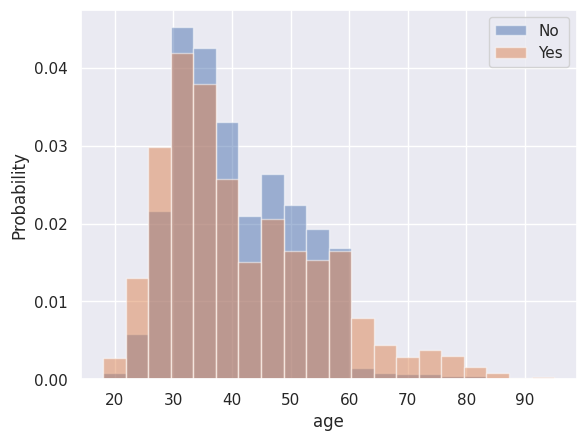

In [ ]:
plt.hist(data[data.y == 0].age, bins=20, density=True, alpha=0.5, label='No')
plt.hist(data[data.y == 1].age, bins=20, density=True, alpha=0.5, label='Yes')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('age')
plt.show()

Q5: C

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

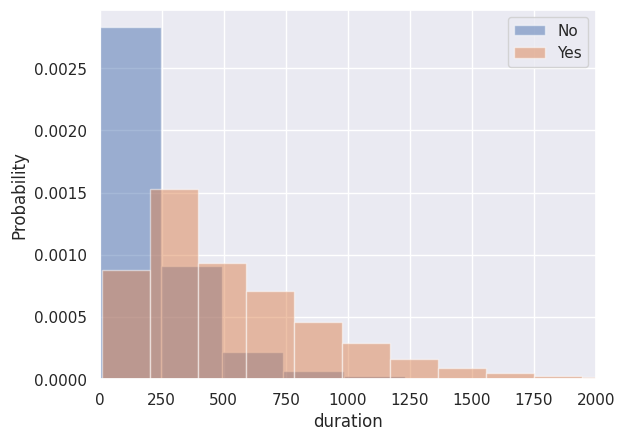

In [ ]:
plt.hist(data[data.y == 0].duration, bins=20, density=True, alpha=0.5, label='No')
plt.hist(data[data.y == 1].duration, bins=20, density=True, alpha=0.5, label='Yes')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('duration')
plt.xlim((0, 2000))
plt.show()

Q6: C

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [ ]:
# TODO define numerical columns
numeric_features = list(df.columns[((df.dtypes == 'int64') & (df.nunique() != 2))])
len(numeric_features)

7

-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [ ]:
# Q8.4
round(np.corrcoef(df.pdays, y.y)[0, 1], 3)

0.104

In [ ]:
# Q8.5
abs(data.corr(numeric_only=True)[numeric_features].loc['y']).idxmax()

'duration'

-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

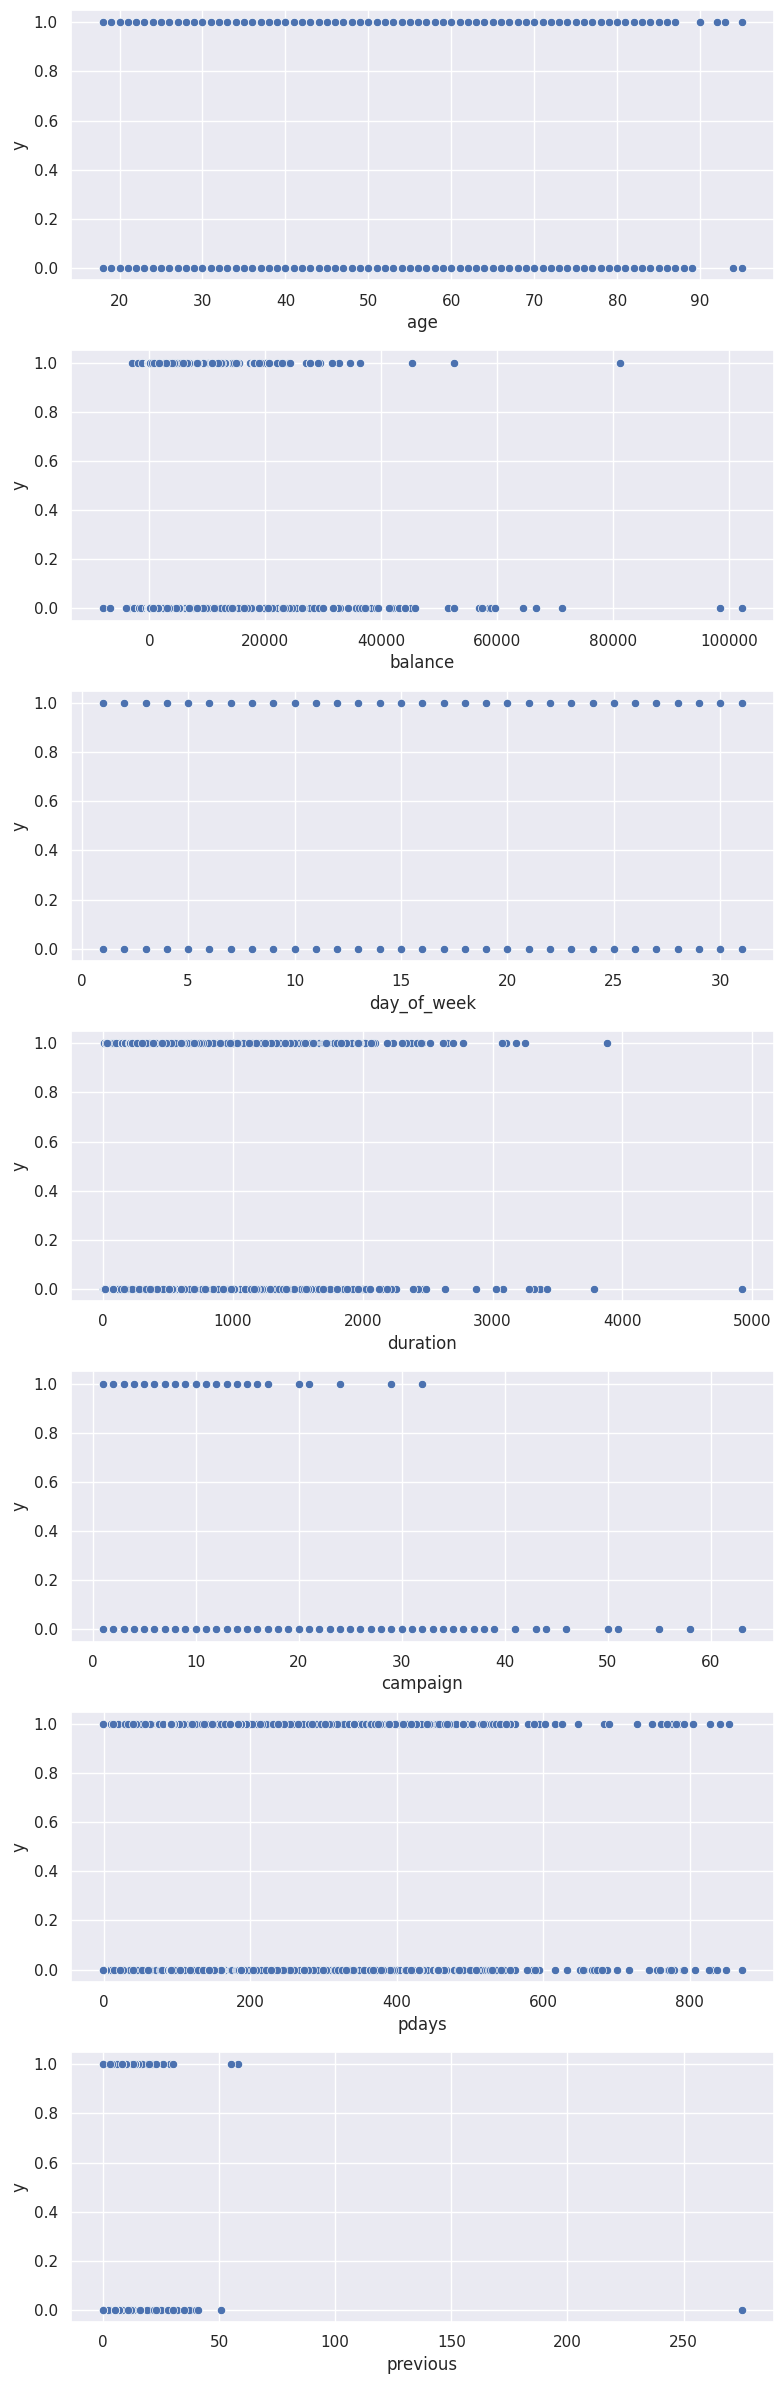

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(8, 24))

for i, ax in enumerate(axes):
    sns.scatterplot(x=numeric_features[i], y='y', data=data, ax=ax)
plt.tight_layout()
plt.show()

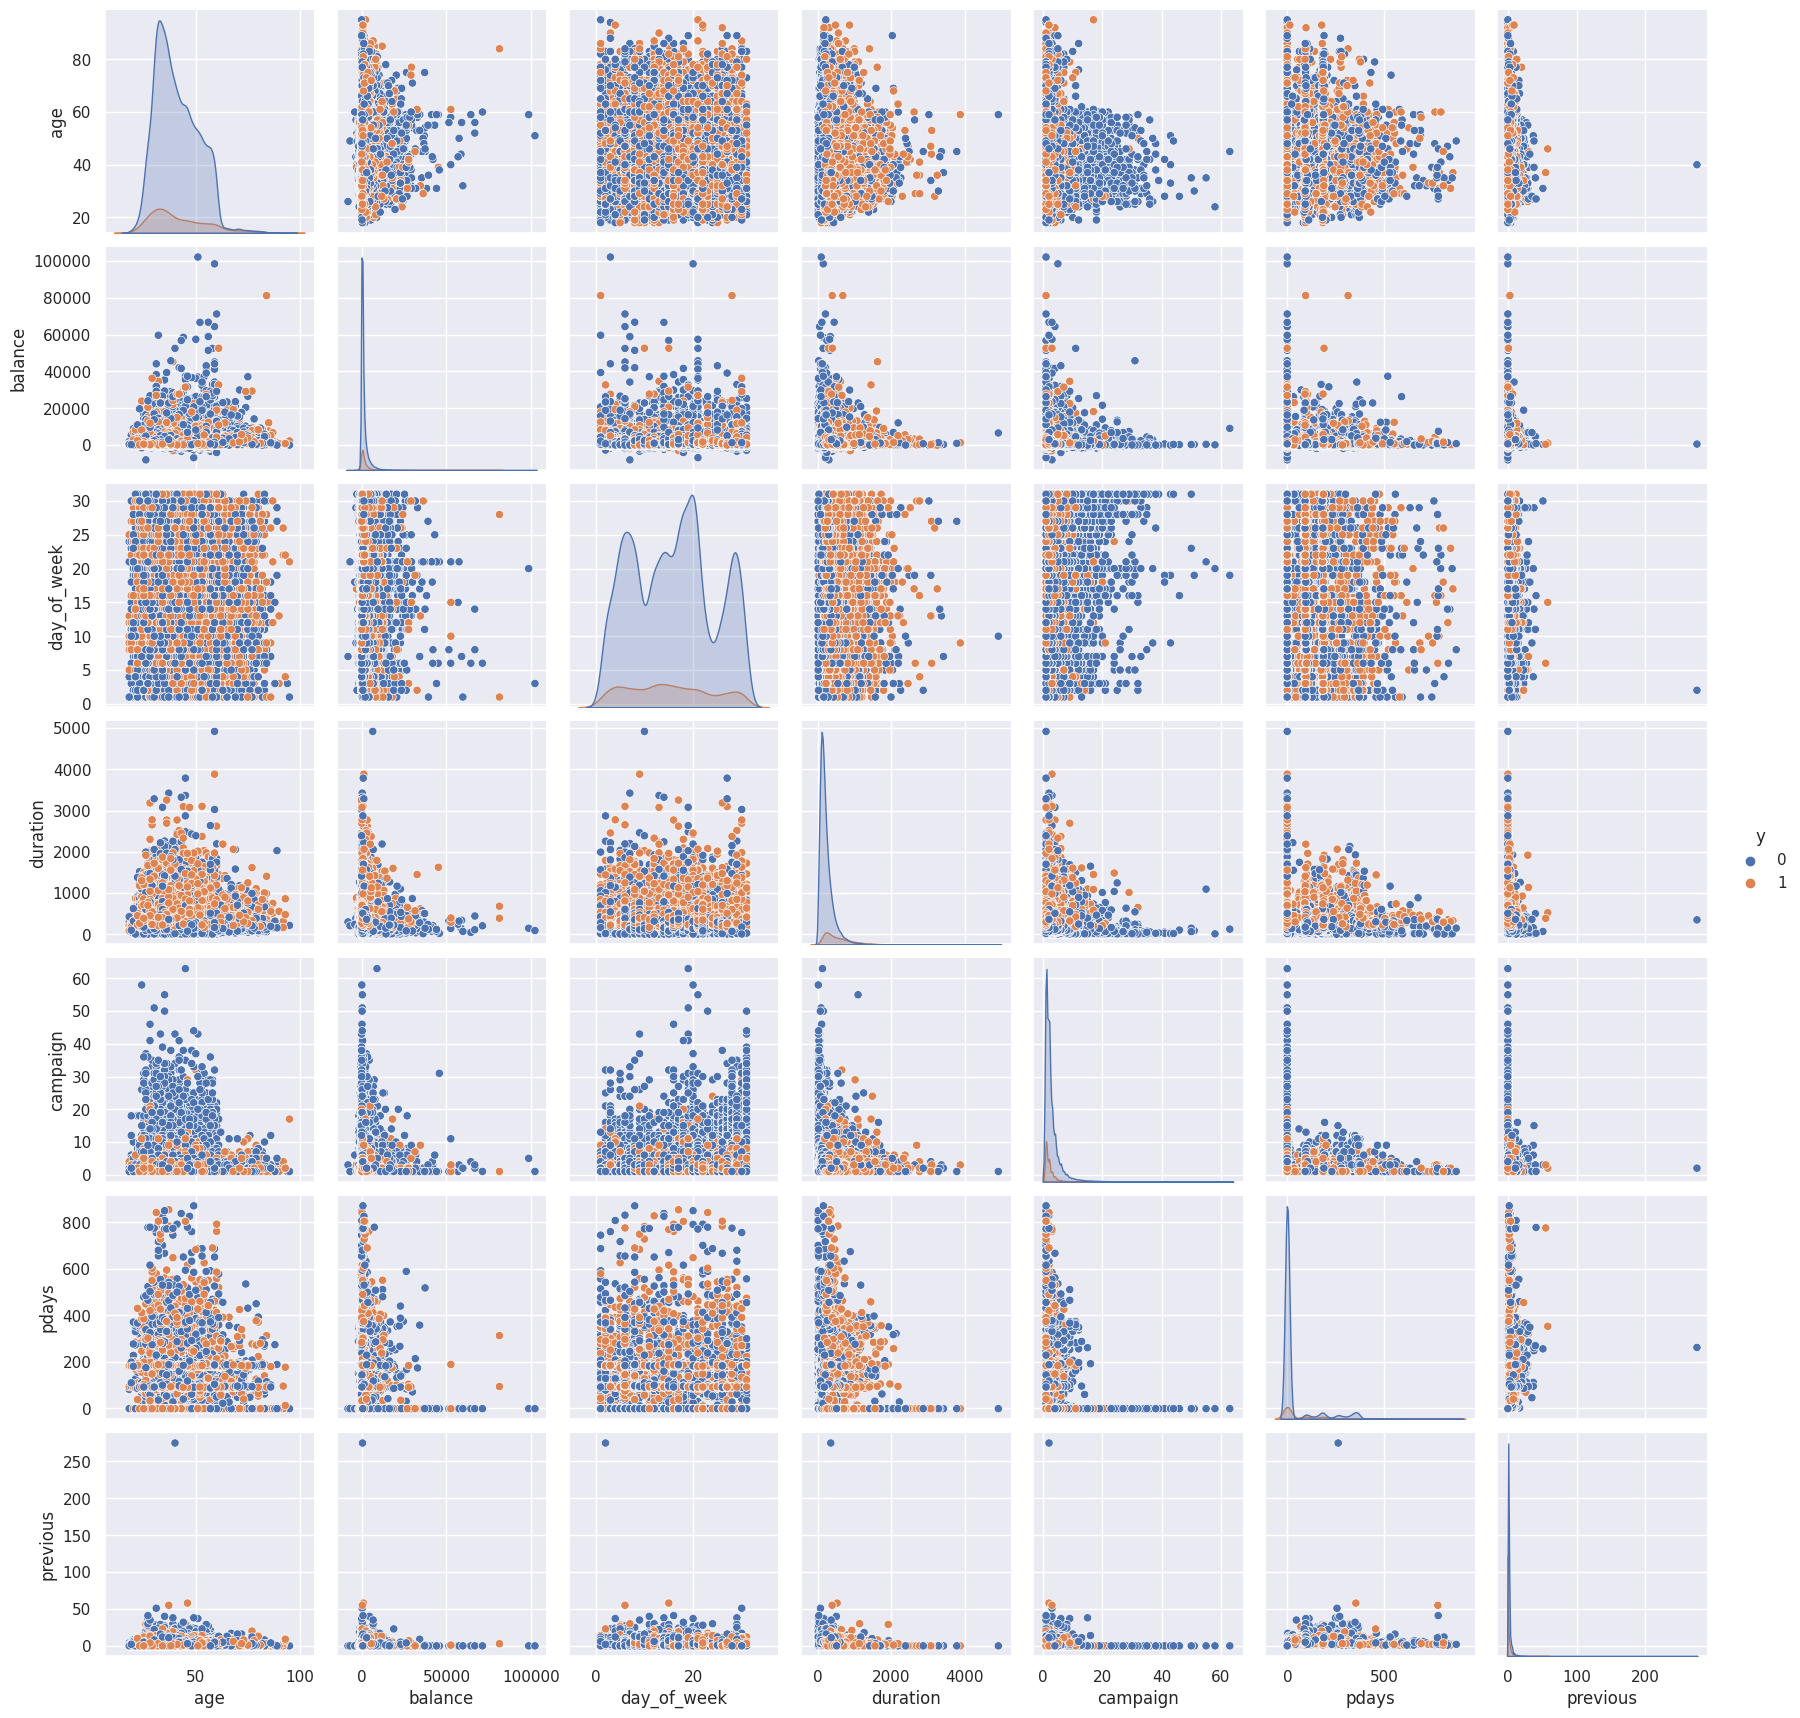

In [ ]:
sns.pairplot(data[numeric_features + ['y']], hue='y')
plt.show()

It seems challenging to distinguish the effect of the variable 'y'. However, the high value of the 'campaign' could potentially serve as an indicator of success. To achieve more accurate predictions, it is crucial to consider more complex features and explore correlations between variables.

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [ ]:
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

In [ ]:
df.contacted_before.value_counts()[0]

36954

------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [ ]:
df.shape[1]

17

-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

In [ ]:
# TODO add one-hot labels and drop columns
df = pd.get_dummies(df, columns=df.columns.drop(numeric_features), drop_first=True)

In [ ]:
df.shape[1]

43

## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
y_train[y_train.y == 1].shape[0]

4198

In [ ]:
x_train.shape

(36168, 43)

## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('scaling', StandardScaler(), numeric_features)], remainder='passthrough')

scaled_deuration = np.append(ct.fit_transform(x_train)[:, x_train.columns.get_indexer(['duration'])].ravel(),
                             ct.transform(x_test)[:, x_test.columns.get_indexer(['duration'])].ravel())

print(f'{np.median(scaled_deuration):.3f}')

ct = ColumnTransformer([('scaling', StandardScaler(), numeric_features)], remainder='passthrough')

-0.299


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fvalue_selector = SelectKBest(f_classif, k=3)
fvalue_selector.fit_transform(x_train, y_train.values.ravel())
sorted(fvalue_selector.get_feature_names_out())

['contacted_before_1', 'duration', 'poutcome_success']

------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [ ]:
# 16.1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

LR = make_pipeline(ct, LogisticRegression(penalty='l2', max_iter=400))

param_grid = {'logisticregression__C': np.logspace(-2, 4, 7)}

LR_gs = GridSearchCV(LR, param_grid, cv=5)
LR_gs.fit(x_train, y_train.values.ravel())
LR_gs.best_params_

{'logisticregression__C': 10.0}

In [ ]:
# 16.2
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test, LR_gs.predict(x_test)), 3)

0.899

In [ ]:
# 16.3
sorted(sorted(list(zip(df.columns,
                       np.abs(LR_gs.best_estimator_.named_steps['logisticregression'].coef_.ravel())
                       )),
              key=lambda x: x[1],
              reverse=True)[:3],
       key=lambda x: x[0])

[('contact_unknown', 1.653957260728381),
 ('month_mar', 1.5426908541108952),
 ('poutcome_success', 2.2468414627601607)]

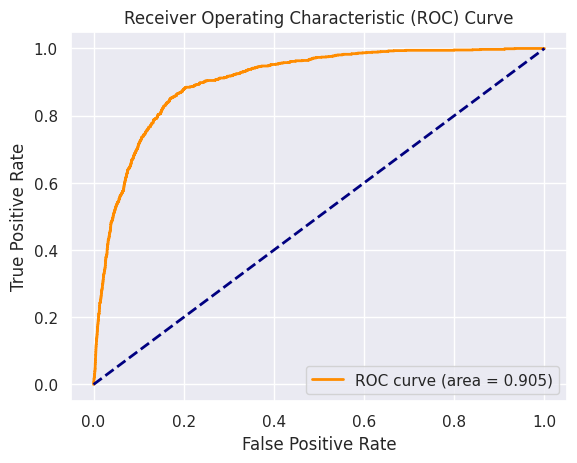

In [ ]:
# 16.4
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_score_lr = roc_auc_score(y_test, LR_gs.predict_proba(x_test)[:, 1])
fpr, tpr, th = roc_curve(y_test, LR_gs.predict_proba(x_test)[:, 1])

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score_lr:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [ ]:
# Q17.1
from sklearn.ensemble import RandomForestClassifier

RF = make_pipeline(ct, RandomForestClassifier(random_state=42))

param_grid = {'randomforestclassifier__max_depth': [i for i in range(2, 16)],
              'randomforestclassifier__n_estimators': [10, 20, 50, 100, 200]}

RF_gs = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1)
RF_gs.fit(x_train, y_train.values.ravel())

RF_gs.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 100}

In [ ]:
# Q17.2
round(roc_auc_score(y_test, RF_gs.predict_proba(x_test)[:, 1]), 3)

0.926

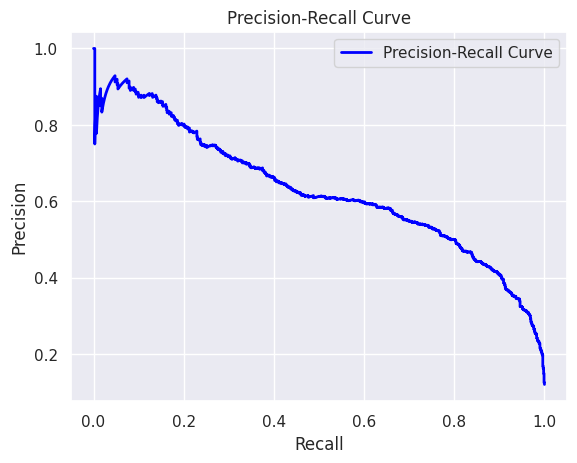

Highest precision for recall > 0.5: 0.614


In [ ]:
# Q17.3
from sklearn.metrics import precision_recall_curve

precision, recall, th = precision_recall_curve(y_test, RF_gs.predict_proba(x_test)[:, 1])

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


highest_precision = max(precision[recall > 0.5])
print(f"Highest precision for recall > 0.5: {highest_precision:.3f}")

In [ ]:
# Q17.5
from sklearn.preprocessing import binarize
from sklearn.metrics import precision_score

round(precision_score(y_test, binarize([RF_gs.predict_proba(x_test)[:, 1]], threshold=0.3).ravel()), 3)

0.562

In [ ]:
# Q17.7
RF_fi = RF_gs.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
sorted(sorted(list(zip(df.columns, RF_fi)),
              key=lambda x: x[1], reverse=True)[:3],
       key=lambda x: x[0])

[('age', 0.07698701305258103),
 ('duration', 0.32688260057244134),
 ('poutcome_success', 0.0900308412815797)]

-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [ ]:
# Q18.1
top_30_features = [feature for feature, importance in
                   sorted(list(zip(df.columns, RF_fi)), key=lambda x: x[1], reverse=True)[:30]]

x_train = df[top_30_features].loc[x_train.index]
x_test = df[top_30_features].loc[x_test.index]

RF = make_pipeline(ct, RandomForestClassifier(random_state=42))

param_grid = {'randomforestclassifier__max_depth': [i for i in range(2, 16)],
              'randomforestclassifier__n_estimators': [10, 20, 50, 100, 200]}

RF_gs = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1)
RF_gs.fit(x_train, y_train.values.ravel())

round(roc_auc_score(y_test, RF_gs.predict_proba(x_test)[:, 1]), 3)

0.907

In [ ]:
# Q18.2
from sklearn.metrics import f1_score

round(f1_score(y_test, RF_gs.predict(x_test)), 3)

0.466

In [ ]:
RF_fi = RF_gs.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
sorted(list(zip(df.columns, RF_fi)), key=lambda x: x[1], reverse=True)[:3]

[('duration', 0.3431460487822031),
 ('job_blue-collar', 0.09164338880092851),
 ('age', 0.08497587686195611)]

Q18.3: The ROC AUC score demonstrates minimal variation, which could be attributed to the fact that the initial number of features was 43, whereas we retained only the top 30 most important features. Notably, upon inspecting the ranking of feature importances, there is an intriguing observation. The alteration in the ranking, particularly the shift in the second-place feature, suggests the possibility that the exclusion of certain features might have disrupted the interplay or synergy with the previously identified second-ranking feature, consequently affecting its importance in the model.


------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

Examining the top 3 features identified by the Random Forest showed in section 18.3, it is noteworthy that there is no overlap in the important features selected by both algorithms. This disparity is expected, considering the fundamentally distinct operating principles of the two algorithms. Logistic Regression aims to identify a linear combination of features that best predicts the target variable. In contrast, Random Forest is capable of capturing complex, higher-order statistical interactions among features, enabling it to handle nonlinear relationships.

Important note: 'duration' highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

In [ ]:
import xgboost as xgb

In [ ]:
bank_marketing = fetch_ucirepo(id=222)

x = bank_marketing.data.features.copy()
y = bank_marketing.data.targets.copy()

In [ ]:
x[x.columns[x.dtypes == 'object']] = x[x.columns[x.dtypes == 'object']].fillna('unknown')
y = y.replace({'yes': 1, 'no': 0})

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
num_features = x.select_dtypes('int64').columns.drop(['day_of_week']).tolist()
cat_features = x.select_dtypes('object').columns.drop(['month'])
day_feature = ['day_of_week']
month_feature = ['month']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

preprocessor = ColumnTransformer([
    ("num",  StandardScaler(), num_features),
    ("cat",  OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
    ("month", OrdinalEncoder(categories=[month_order]), month_feature)],
    remainder='passthrough'
)

In [ ]:
model_xgb = make_pipeline(preprocessor,
                          xgb.XGBClassifier(n_estimators=250, n_jobs=-1, max_depth=3)
                         )

In [ ]:
model_xgb.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')),
                                                 ('month',
                                                  Ordi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=250, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
round(roc_auc_score(y_test, model_xgb.predict_proba(x_test)[:, 1]), 3)

0.933